In [2]:
import pandas as pd 

solar_config = pd.read_csv("../data/raw/configs/eia_solar_configs.csv")
wind_config = pd.read_csv("../data/raw/configs/eia_wind_configs.csv")

In [3]:
solar_config.info()
wind_config.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   plant_code             4026 non-null   int64  
 1   plant_code_unique      4026 non-null   object 
 2   plant_name             4026 non-null   object 
 3   generator_id           4026 non-null   object 
 4   state                  4026 non-null   object 
 5   county                 4026 non-null   object 
 6   ba                     4026 non-null   object 
 7   nerc_region            4026 non-null   object 
 8   azimuth                4026 non-null   float64
 9   tilt                   4026 non-null   float64
 10  component_capacity_mw  3895 non-null   object 
 11  system_capacity        4026 non-null   float64
 12  module_type            4026 non-null   int64  
 13  array_type             4026 non-null   int64  
 14  lat                    4026 non-null   float64
 15  lon 

In [4]:
solar_config.head()
wind_config.head()

,plant_code,plant_code_unique,generator_id,lat,lon,ba,nerc_region,state,system_capacity,wind_farm_xCoordinates,...,wind_turbine_hub_ht,wind_turbine_powercurve_powerout,wind_turbine_powercurve_windspeeds,wind_turbine_rotor_diameter,wind_resource_shear,wind_resource_turbulence_coeff,wind_resource_model_choice,wind_farm_wake_model,turb_generic_loss,adjust:constant
0,508,508,T1-T3,38.033327,-102.537915,PSCO,WECC,CO,4500.0,"[0, 660.0, 330.0]",...,79.97952,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...","['0', '0.25', '0.5', '0.75', '1', '1.25', '1.5...",82.5,0.14,0.1,0,0,15,0
1,508,508_1,T4,38.033327,-102.537915,PSCO,WECC,CO,1500.0,[0],...,79.97952,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...","['0', '0.25', '0.5', '0.75', '1', '1.25', '1.5...",82.5,0.14,0.1,0,0,15,0
2,692,692,10,41.835278,-106.242778,WAUW,WECC,WY,4900.0,"[0, 376.0, 752.0, 1128.0, 188.0, 564.0, 940.0]",...,49.98720,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...","['0', '0.25', '0.5', '0.75', '1', '1.25', '1.5...",47.0,0.14,0.1,0,0,15,0
3,692,692_1,11,41.835278,-106.242778,WAUW,WECC,WY,1300.0,"[0, 336.0]",...,49.98720,"[0.0, 0.0, 0.0, 0.0, 21.5, 43.35, 65.2, 91.41,...","[3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8....",42.0,0.14,0.1,0,0,15,0
4,944,944,10,41.451494,-90.148547,MISO,MRO,IL,1500.0,[0],...,60.96000,"['0', '0', '0', '70.8', '147.7', '262.7', '420...","['1', '2', '3', '4', '5', '6', '7', '8', '9', ...",77.0,0.14,0.1,0,0,15,0


In [5]:
solar_config.isna().sum()
wind_config.isna().sum()

solar_config["plant_code_unique"].duplicated().sum()
wind_config["plant_code_unique"].duplicated().sum()

np.int64(0)

Text(0.5, 1.0, 'Wind Plant Capacities')

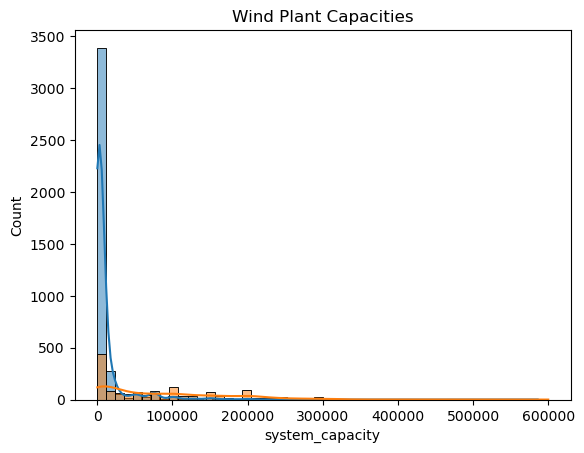

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.histplot(solar_config["system_capacity"], bins = 50, kde = True)
plt.title("Solar Plant Capacities")

sns.histplot(wind_config["system_capacity"], bins = 50, kde = True)
plt.title("Wind Plant Capacities")

Text(0.5, 1.0, 'Solar Plant Capacities')

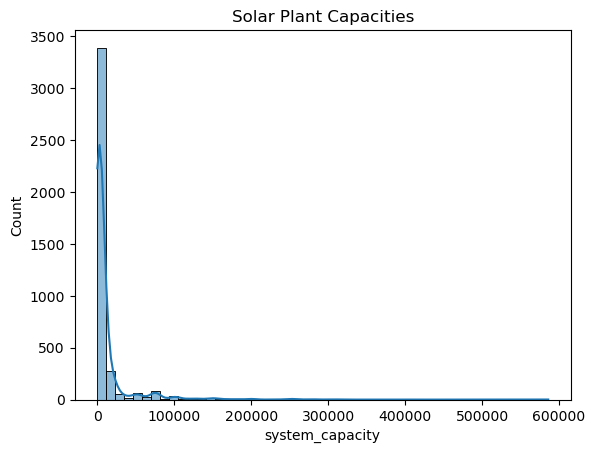

In [7]:
sns.histplot(solar_config["system_capacity"], bins = 50, kde = True)
plt.title("Solar Plant Capacities")

Text(0.5, 1.0, 'Wind Plant Capacities')

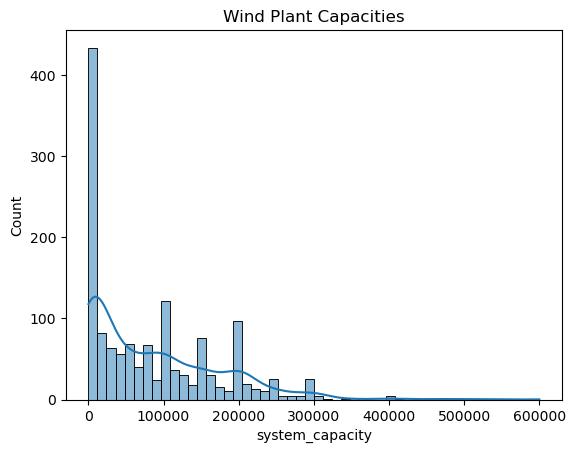

In [8]:
sns.histplot(wind_config["system_capacity"], bins = 50, kde = True)
plt.title("Wind Plant Capacities")

<Axes: title={'center': 'Solar Plants by State'}, xlabel='state'>

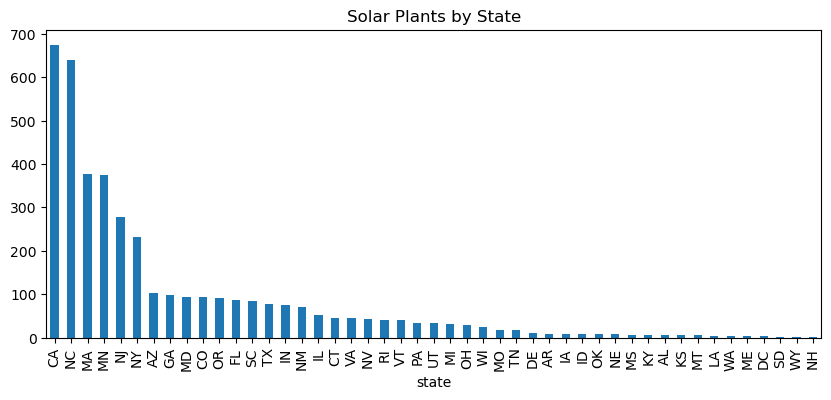

In [9]:
solar_config["state"].value_counts().plot(kind="bar", figsize=(10,4), title="Solar Plants by State")

In [10]:
solar_config.head()

,plant_code,plant_code_unique,plant_name,generator_id,state,county,ba,nerc_region,azimuth,tilt,component_capacity_mw,system_capacity,module_type,array_type,lat,lon,losses
0,141,141,Agua Fria,PV-3,AZ,Maricopa,SRP,WECC,180.0,33.4000,0.2,200.0,0,2,33.556100,-112.215300,14
1,645,645,Big Bend,1,FL,Hillsborough,TEC,SERC,180.0,27.7944,19.8,19800.0,2,2,27.794400,-82.403600,14
2,944,944,Geneseo,12,IL,Henry,MISO,MRO,180.0,30.0000,1.2,1200.0,0,0,41.451494,-90.148547,14
3,960,960,North Ninth Street,SOL1,IL,Ogle,PJM,RFC,180.0,25.0000,0.3,300.0,0,0,41.909300,-89.049800,14
4,1172,1172,Osage (IA),SO,IA,Mitchell,MISO,MRO,35.0,35.0000,0.8,800.0,0,0,43.279722,-92.810556,14


In [11]:
wind_config.head()

,plant_code,plant_code_unique,generator_id,lat,lon,ba,nerc_region,state,system_capacity,wind_farm_xCoordinates,...,wind_turbine_hub_ht,wind_turbine_powercurve_powerout,wind_turbine_powercurve_windspeeds,wind_turbine_rotor_diameter,wind_resource_shear,wind_resource_turbulence_coeff,wind_resource_model_choice,wind_farm_wake_model,turb_generic_loss,adjust:constant
0,508,508,T1-T3,38.033327,-102.537915,PSCO,WECC,CO,4500.0,"[0, 660.0, 330.0]",...,79.97952,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...","['0', '0.25', '0.5', '0.75', '1', '1.25', '1.5...",82.5,0.14,0.1,0,0,15,0
1,508,508_1,T4,38.033327,-102.537915,PSCO,WECC,CO,1500.0,[0],...,79.97952,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...","['0', '0.25', '0.5', '0.75', '1', '1.25', '1.5...",82.5,0.14,0.1,0,0,15,0
2,692,692,10,41.835278,-106.242778,WAUW,WECC,WY,4900.0,"[0, 376.0, 752.0, 1128.0, 188.0, 564.0, 940.0]",...,49.98720,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...","['0', '0.25', '0.5', '0.75', '1', '1.25', '1.5...",47.0,0.14,0.1,0,0,15,0
3,692,692_1,11,41.835278,-106.242778,WAUW,WECC,WY,1300.0,"[0, 336.0]",...,49.98720,"[0.0, 0.0, 0.0, 0.0, 21.5, 43.35, 65.2, 91.41,...","[3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8....",42.0,0.14,0.1,0,0,15,0
4,944,944,10,41.451494,-90.148547,MISO,MRO,IL,1500.0,[0],...,60.96000,"['0', '0', '0', '70.8', '147.7', '262.7', '420...","['1', '2', '3', '4', '5', '6', '7', '8', '9', ...",77.0,0.14,0.1,0,0,15,0


In [13]:
# Paths to generation files
SOLAR_GEN_PATH = "../data/raw/solar/solar_gen_cf_2020_bc.csv"
WIND_GEN_PATH = "../data/raw/wind/wind_gen_cf_2020.csv"

# Load a small sample to inspect structure
solar_gen_df = pd.read_csv(SOLAR_GEN_PATH, nrows = 5)
wind_gen_df = pd.read_csv(WIND_GEN_PATH, nrows = 5)

In [14]:
# Show top rows 
print("Solar Generation Data (first 5 rows):")
display(solar_gen_df)

print("Wind Generation Data (first 5 rows):")
display(wind_gen_df)

Solar Generation Data (first 5 rows):


,datetime,141,645,944,960,1172,1355,2240,2854,2953,...,64124,64124_1,64201,64201_1,64404,64404_1,64422,64422_1,64422_2,64422_3
0,2020-01-01 01:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01 02:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-01 03:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-01 04:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-01 05:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Wind Generation Data (first 5 rows):


,datetime,508,508_1,692,692_1,944,944_1,1172,1998,2022,...,63988,64051,64052,64053,64057,64130,64309,64332,64377,64377_1
0,2020-01-01 01:00:00+00:00,0.195,0.195,0.801,0.785,0.489,0.489,0.189,0.653,0.000,...,0.722,0.85,0.85,0.85,0.828,0.194,0.406,0.770,0.726,0.700
1,2020-01-01 02:00:00+00:00,0.450,0.450,0.801,0.785,0.434,0.434,0.116,0.736,0.000,...,0.737,0.85,0.85,0.85,0.850,0.234,0.444,0.779,0.826,0.826
2,2020-01-01 03:00:00+00:00,0.749,0.749,0.801,0.785,0.381,0.381,0.110,0.821,0.029,...,0.750,0.85,0.85,0.85,0.850,0.325,0.482,0.790,0.848,0.845
3,2020-01-01 04:00:00+00:00,0.508,0.508,0.801,0.785,0.272,0.272,0.185,0.849,0.041,...,0.687,0.85,0.85,0.85,0.850,0.564,0.595,0.803,0.849,0.845
4,2020-01-01 05:00:00+00:00,0.287,0.287,0.801,0.785,0.185,0.185,0.312,0.870,0.058,...,0.600,0.85,0.85,0.85,0.850,0.763,0.710,0.803,0.849,0.846


In [19]:
solar = pd.read_csv("../data/processed/solar_gen_2020_mw.csv", index_col=0, parse_dates=True)
wind = pd.read_csv("../data/processed/wind_gen_2020_mw.csv", index_col=0,  parse_dates=True)

In [20]:
solar.head()

,141,645,944,960,1172,1355,2240,2854,2953,6074,...,64124,64124_1,64201,64201_1,64404,64404_1,64422,64422_1,64422_2,64422_3
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 01:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 02:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 03:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 04:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 05:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
wind.head()

,508,508_1,692,692_1,944,944_1,1172,1998,2022,2022_1,...,63988,64051,64052,64053,64057,64130,64309,64332,64377,64377_1
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 01:00:00+00:00,877.5,292.5,3924.9,1020.5,733.5,733.5,302.4,783.6,0.0,0.0,...,180500.0,8500.0,8500.0,8500.0,82800.0,485.0,121800.0,1386.0,71874.0,46200.0
2020-01-01 02:00:00+00:00,2025.0,675.0,3924.9,1020.5,651.0,651.0,185.6,883.2,0.0,0.0,...,184250.0,8500.0,8500.0,8500.0,85000.0,585.0,133200.0,1402.2,81774.0,54516.0
2020-01-01 03:00:00+00:00,3370.5,1123.5,3924.9,1020.5,571.5,571.5,176.0,985.2,58.0,58.0,...,187500.0,8500.0,8500.0,8500.0,85000.0,812.5,144600.0,1422.0,83952.0,55770.0
2020-01-01 04:00:00+00:00,2286.0,762.0,3924.9,1020.5,408.0,408.0,296.0,1018.8,82.0,82.0,...,171750.0,8500.0,8500.0,8500.0,85000.0,1410.0,178500.0,1445.4,84051.0,55770.0
2020-01-01 05:00:00+00:00,1291.5,430.5,3924.9,1020.5,277.5,277.5,499.2,1044.0,116.0,116.0,...,150000.0,8500.0,8500.0,8500.0,85000.0,1907.5,213000.0,1445.4,84051.0,55836.0
